In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Load data
data_path = Path("C:\\Users\\welde\\Desktop\\Oslomet\\ACIT4610---Final-Group-Project\\R_f\\Project_4\\data\\SMSSpamCollection")
print(f"File exists: {data_path.exists()}")


df = pd.read_csv(
    data_path, 
    sep='\t',              # Tab-separated
    header=None,           # No header row
    names=['label', 'message'],  # Column names
    encoding='utf-8'       # UTF-8 encoding
)

print(f"Loaded {len(df)} messages")
df.head()

File exists: True
Loaded 5572 messages


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Missing values in each column:
label      0
message    0
dtype: int64


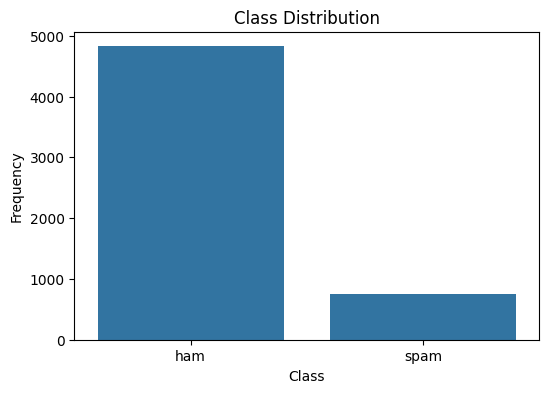

Number of duplicate rows: 403
Number of duplicate rows by label:
label
ham     309
spam     94
dtype: int64
Message length statistics:
count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


C:\Users\welde\AppData\Local\Temp\ipykernel_440\442476248.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_by_label = df.groupby('label').apply(lambda x: x.duplicated().sum())


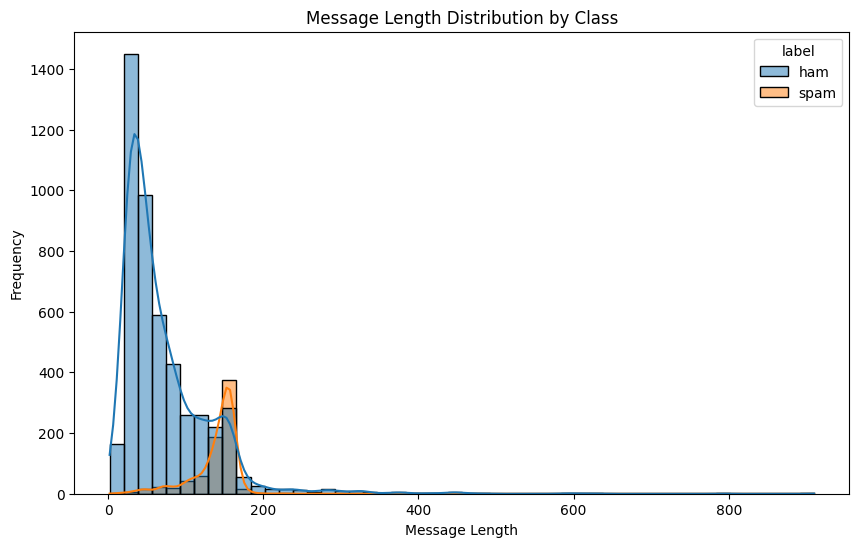

In [11]:
#Explore data
# check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check class distribution
class_counts = df['label'].value_counts()
#print("Class distribution:")
#print(class_counts)

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# check for duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# check duplicates by label
duplicate_by_label = df.groupby('label').apply(lambda x: x.duplicated().sum())
print("Number of duplicate rows by label:")
print(duplicate_by_label)

# Analyze message lengths
df['message_length'] = df['message'].apply(len)     
print("Message length statistics:")
print(df['message_length'].describe())  

# Visualize message length distribution
plt.figure(figsize=(10,6))  
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Class")
plt.xlabel("Message Length")        
plt.ylabel("Frequency")
plt.show()



In [12]:
# preprocess data

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})



In [ ]:
# feature engineering